<a href="https://colab.research.google.com/github/Ha-eunYu/Section_Project/blob/main/DataLoader_221124.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from psutil import virtual_memory
import torch

# colab-GPU 사용 확인
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('GPU 연결 실패!')
else:
  print(gpu_info)

# RAM 사용량 체크
ram_gb = virtual_memory().total / 1e9
print('{:.1f} gigabytes of available RAM\n'.format(ram_gb))

# pytorch-GPU 연결 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('학습을 진행하는 기기:',device)

# 구글 드라이브 연결. 만약 직접 데이터셋을 사용한다면 주석 해제.
# from google.colab import drive
# drive.mount('/content/drive')


Thu Nov 24 12:58:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#  동적 코드 다운
!pip install fastai==2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 187 kB 484 kB/s 
     |████████████████████████████████| 831.4 MB 6.7 kB/s 
     |████████████████████████████████| 55 kB 5.5 MB/s 
     |████████████████████████████████| 24.3 MB 1.3 MB/s 
     |████████████████████████████████| 19.1 MB 823 kB/s 
     |████████████████████████████████| 19.1 MB 1.1 MB/s 
     |████████████████████████████████| 21.0 MB 1.3 MB/s 
     |████████████████████████████████| 23.2 MB 1.8 MB/s 
     |████████████████████████████████| 23.3 MB 1.3 MB/s 
     |████████████████████████████████| 23.3 MB 1.3 MB/s 
     |████████████████████████████████| 22.1 MB 1.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
  

In [3]:
# 파이토치를 빠르게 확인할 수 있음

In [4]:
from fastai.data.external import untar_data,URLs
import glob

coco_path = untar_data(URLs.COCO_SAMPLE)

In [5]:
print(coco_path)

/root/.fastai/data/coco_sample


In [6]:
paths = glob.glob(str(coco_path) + "/train_sample/*.jpg")


In [ ]:
# spc = *.png
# dataset
# DIV2K
# Set5 Set12

In [9]:
import numpy as np

np.random.seed(1)
chosen_paths = np.random.choice(paths, 5000, replace=False)
index = np.random.permutation(5000)

train_paths = chosen_paths[index[:4000]] # 앞의 4000을 train 이미조 쓰겠다.
val_paths = chosen_paths[index[4000:]]

print(len(train_paths))
print(len(val_paths))

4000
1000


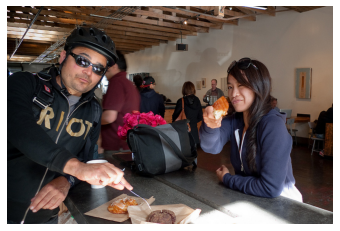

In [11]:
import matplotlib
import matplotlib.pyplot as plt

sample = matplotlib.image.imread(train_paths[2])
plt.imshow(sample)
plt.axis("off")
plt.show()

In [12]:
# 기본적인 데이터 로더
import torch
from torch.utils.data import Dataset

In [13]:
class myDataset(Dataset):

  # 생성자를 만듭시다!!
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.x.shape[0]


In [15]:
x = np.random.randint(0, 100, 5)
y = np.random.randint(0, 100, 5)
print(x)
print(y)

[13 76 68 69  3]
[32 20 70 22 97]


In [16]:
x = torch.Tensor(x)
y = torch.Tensor(y)

In [17]:
print(x)
print(y)

tensor([13., 76., 68., 69.,  3.])
tensor([32., 20., 70., 22., 97.])


In [18]:
dataset = myDataset(x,y)

In [19]:
print(dataset[0])

(tensor(13.), tensor(32.))


In [29]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=3, num_workers=2, pin_memory=True)

In [30]:
x,y = next(iter(dataloader))
print(x,y)

tensor([13., 76., 68.]) tensor([32., 20., 70.])
